In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
import cgm
import numpy as np
import igraph as ig

In [9]:
from collections import defaultdict, Counter

In [10]:
def dd(degs,cutoff=3):
    xk, fk = map(np.array, zip(*sorted(Counter(degs).items())))
    xk, fk = xk[cutoff:], fk[cutoff:]
    pk = fk.astype(float)/np.sum(fk)
    return xk,pk

In [11]:
xk, pk = [0,1,2,3], [0.25,0.25,0.25,0.25]
p_new, p_in = .4,.4
p_vc = .9
N,m = 20000,8

In [14]:
g = cgm.get_cgm_graph(N,m,p_new,p_in,p_vc,xk,pk)
print (g.summary())
print (g.modularity(g.vs['attr']))

IGRAPH U--- 20040 186509 -- 
+ attr: attr (v)
0.7099919516997548


# deg dist

In [123]:
p_new = 1.
N = 5000
m = 4

In [79]:
graphs = {}
for p_unif_vc in [.05,0.3,0.6,0.95]:
    graphs[p_unif_vc] = cgm.get_cgm_graph(N,m,p_new,0,p_unif_vc,range(4),[0.25]*4)

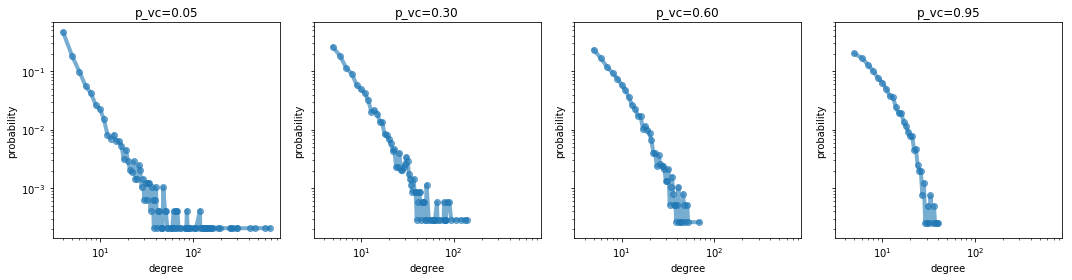

In [81]:
fig, axs = plt.subplots(1,4,figsize=(15,4),sharex=True,sharey=True)

for (p_vc, graph), ax in zip(graphs.items(),fig.axes):
    xk, pk = dd(graph.degree())
    ax.loglog(xk,pk,'o-',lw=4,alpha=0.6,label='p_vc={:.2f}'.format(p_vc))
    ax.set_title('p_vc={:.2f}'.format(p_vc))
    ax.set_ylabel('probability')
    ax.set_xlabel('degree')

plt.tight_layout()
plt.savefig('./pvc_deg_dist.pdf')

In [82]:
graphs2 = {}
for p_in in [.05,0.15,0.3,0.5]:
    graphs2[p_in] = cgm.get_cgm_graph(N,m,1-p_in,0,p_in,range(4),[0.25]*4)

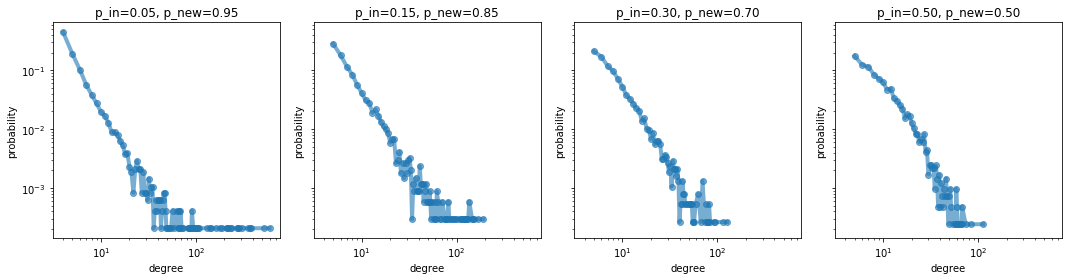

In [83]:
fig, axs = plt.subplots(1,4,figsize=(15,4),sharex=True,sharey=True)

for (p_vc, graph), ax in zip(graphs2.items(),fig.axes):
    xk, pk = dd(graph.degree())
    ax.loglog(xk,pk,'o-',lw=4,alpha=0.6,label='p_vc={:.2f}'.format(p_vc))
    ax.set_title('p_in={:.2f}, p_new={:.2f}'.format(p_vc,1-p_vc))
    ax.set_ylabel('probability')
    ax.set_xlabel('degree')
plt.tight_layout()
plt.savefig('pin_deg.pdf')

In [122]:
m

(-0.08692730529505636,
 -0.06031267643741765,
 -0.1147558039469006,
 -0.033557983279524584)

In [124]:
graphs3 = {}
for p_out in [.05,0.15,0.3,0.5]:
    graphs3[p_out] = cgm.get_cgm_graph(N,m,1-p_out,0,0,range(4),[0.25]*4)

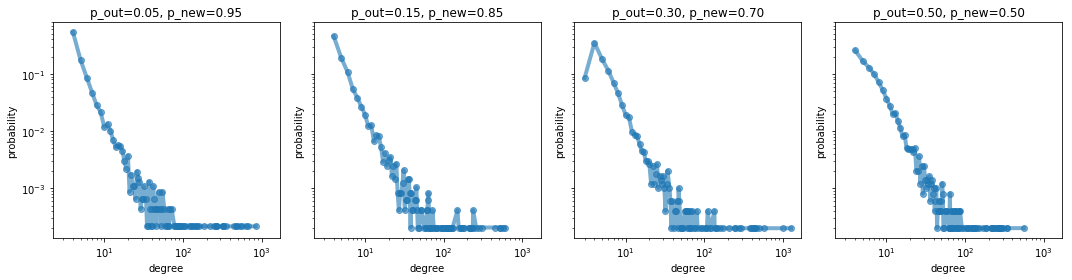

In [125]:
fig, axs = plt.subplots(1,4,figsize=(15,4),sharex=True,sharey=True)

for (p_vc, graph), ax in zip(graphs3.items(),fig.axes):
    xk, pk = dd(graph.degree())
    ax.loglog(xk,pk,'o-',lw=4,alpha=0.6,label='p_vc={:.2f}'.format(p_vc))
    ax.set_title('p_out={:.2f}, p_new={:.2f}'.format(p_vc,1-p_vc))
    ax.set_ylabel('probability')
    ax.set_xlabel('degree')
plt.tight_layout()
plt.savefig('pout_deg.pdf')

# modularity

In [126]:
p_vc, mod_vc = zip(*sorted([(vc,g.modularity(g.vs['attr'])) for vc,g in graphs.items()]))
p_in, mod_in = zip(*sorted([(vc,g.modularity(g.vs['attr'])) for vc,g in graphs2.items()]))
p_out, mod_out = zip(*sorted([(vc,g.modularity(g.vs['attr'])) for vc,g in graphs3.items()]))

In [129]:
import seaborn as sns

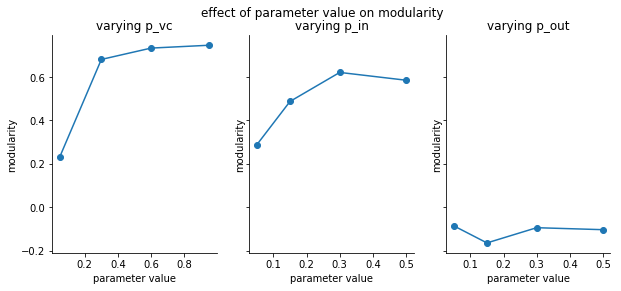

In [135]:
fig, axs = plt.subplots(1,3,figsize=(10,4),sharey=True)
d = [(p_vc, mod_vc), (p_in, mod_in), (p_out, mod_out)]
t = ['varying {}'.format(k) for k in ['p_vc', 'p_in', 'p_out']]

for ax, (p,m),title in zip(fig.axes, d,t):
    ax.plot(p,m,'o-')
    ax.set_title(title)    
    ax.set_ylabel('modularity')
    ax.set_xlabel('parameter value')
    sns.despine()

fig.suptitle('effect of parameter value on modularity')
fig.savefig('modularity.pdf')